# Predicting Greyhound Finishers Using Machine Learning
The purpose of this project is to use Machine Learning to predict greyhound finishers using a machine learning-based approach. We are working with the Kaggle dataset available here: https://www.kaggle.com/datasets/davidregan/greyhound-racing-uk-predict-finish-position?resource=download.

![alt text](greyhound-stock-image.jpg)

## Understanding the Dataset
### Description
This dataset consists of race odds, race information and prior race performance statistics for six greyhounds in each of 2,000 greyhound races run at Crayford in the United Kingdom. All races were run at the standard 380 metres distance.

2,000 races, each with six runners comprises 12,000 data-points in total.

Each data-point/greyhound has 27 predictor variables, plus two potential target variables 'finished' for finish position, first to sixth, and 'Winner', for race win-lose. These are explained below.

The data was constructed from the Racing Post Greyhound Portal and a Betfair API. Many of the predictor variables such as 'Wins_380' were constructed by aggregating prior performance data for each greyhound.

Some features are highly correlated such as the different odds/betting data - 'BSP' (Betfair Starting Price) and 'Odds' (The starting price quoted in The Racing Post).

27 features were considered as predictors of race finish position. A description of each feature is provided below. Features are divided into relevant groups.

#### Race identifier
'Race_ID' --- Unique identifier for each race. Use in machine learning questionable.
#### Odds related
'Odds'--- Bookmaker odds found in the racing post.
'BSP'--- Betfair odds, normally higher than the bookmaker odds.
'Public_Estimate'--- 1 to 6 reflecting the expected finish position based on BSP.
#### All previous races run by the greyhound
'Races_All'--- Total number of races run by the greyhound prior to the race in question.
'Distance_All'--- Average distance for all races run by a greyhound.
'Finish_All'--- Average finish position for all races run by a greyhound. Normalised to 6 runner races.
'Distance_Places_All'---The average distance of races were the greyhound finished 1st or 2nd. This statistic should indicate a
distance preference for each greyhound. For example, if a greyhound has a statistic of 474.0 metres, he
appears to perform well at longer distances than the 380.0 metres of the race to be tested.
'Wide'--- Percentage of races in which the greyhound ran wide, thereby hampering their win chances. Wide runs are not very common.
#### Recent races (seven most recent)
'Distance_Recent'--- Average distance run in seven most recent races.
'Finish_Recent'--- Average finish position in seven most recent races. Statistic corrected for trial races.
'Odds_Recent'--- Average bookmaker odds seven most recent races.
'Early_Recent'--- Average early position in seven most recent races. The recorded position of the greyhound roughly 20
percent of the way into a race.
#### Crayford 380 metre races only
'Races_380'--- Total races of this type in form. This is the race type it is now racing in and for which we want to predict
an expected finish position.

'Wins_380'--- Win percentage for all races at Crayford 380 metres.

'Finish_380'--- Average finish position in seven most recent races at Crayford 380 metres. Corrected for trial races.

'Odds_380'--- Average bookmaker odds in the seven most recent races at Crayford 380 metres.

'Early_380'--- Average relative early position in seven most recent Crayford 380m races.

'Grade_380'--- Average race grade in the seven most recent races at Crayford 380 metres.

'Stay_380'--- Average finish position minus early position for seven most recent Crayford 380m races. A measure of
the greyhound’s stamina at the distance. For example, a statistic of -2.5 indicates that a greyhound starts
relatively well but then fails back towards the end.

'Time_380'--- Average race completion time for races at Crayford 380 metres. Seven most recent.

'Early_Time_380'--- Average time to first bend (20 percent into the race) for races at Crayford 380 metres. Seven most
recent.

'Wide_380'--- Average number of wide ‘W’ remarks in races at Crayford 380 metres. Seven most recent.

'Dist_By'--- Average distance in metres that a greyhound finished to the race winner. Calculated from seven most
recent Crayford 380m races.

#### Other features
'Trap'--- Trap number from 1 to 6 for each greyhound’s starting trap/stall.
'Last_Run'--- Number of days since the greyhound’s last race.
'Favourite'--- Trap number of the greyhound who is race favourite i.e. the one with the lowest BSP.
#### Target variable
'Finished'--- 1 to 6 for first to sixth finishing places.
or
'Winner'--- 1 or 0, for binary win race or not.

## Solution Approach
Predicting the target variable entails a typical classification problem. We will try the following tree-based models for this purpose, in order.
1. Logistic regression (predicting winner or not)
2. Decision tree (both for predicting "finished" and "winner".)
3. Boosted tree (both for predicting "finished" and "winner".)
4. Bagged tree (both for predicting "finished" and "winner".)
5. Random forest (both for predicting "finished" and "winner".)
6. AdaBoost (both for predicting "finished" and "winner".)
7. XGBoost (both for predicting "finished" and "winner".)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Load the dataset
data = pd.read_csv('data/data_final.csv')

# Display basic information
print(f"Dataset shape: {data.shape}")
print("\nFirst few rows:")
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(data.describe())

Dataset shape: (12006, 28)

First few rows:
   Race_ID  Trap  Odds  BSP  Public_Estimate  Last_Run  Distance_All  \
0        0     6  2.75  4.0                1        12        456.47   
1        0     3  5.00  7.6                4         5        410.48   
2        0     5  5.00  9.4                6         9        386.45   
3        0     4  7.00  7.8                5         9        380.00   
4        0     2  5.00  5.1                2        13        385.00   

   Finish_All  Distance_Places_All  Races_All  ...  Early_380  Grade_380  \
0        4.09               402.86         17  ...       2.00       4.00   
1        3.53               414.00         21  ...       3.43       3.29   
2        3.39               380.00         31  ...       3.43       3.71   
3        3.03               380.00         21  ...       2.43       4.43   
4        2.59               388.33         40  ...       3.14       2.71   

   Time_380  Early_Time_380  Stay_380  Favourite  Finished  Wide_3


Correlation with 'Finished':
Finished               1.000000
Public_Estimate        0.224945
BSP                    0.223872
Odds                   0.207712
Finish_All             0.069775
Odds_380               0.062572
Odds_Recent            0.061825
Finish_380             0.053288
Finish_Recent          0.049435
Stay_380               0.045434
Last_Run               0.033326
Distance_Recent        0.031767
Early_Time_380         0.024740
Distance_All           0.018103
Trap                   0.016462
Distance_Places_All    0.015190
Wins_380               0.009016
Grade_380              0.008554
Races_All              0.007353
Races_380              0.005180
Race_ID                0.000089
Favourite             -0.000121
Wide_380              -0.001056
Time_380              -0.001633
Early_Recent          -0.003061
Early_380             -0.009208
Dist_By               -0.043816
Winner                -0.654467
Name: Finished, dtype: float64

Correlation with 'Winner':
Winner         

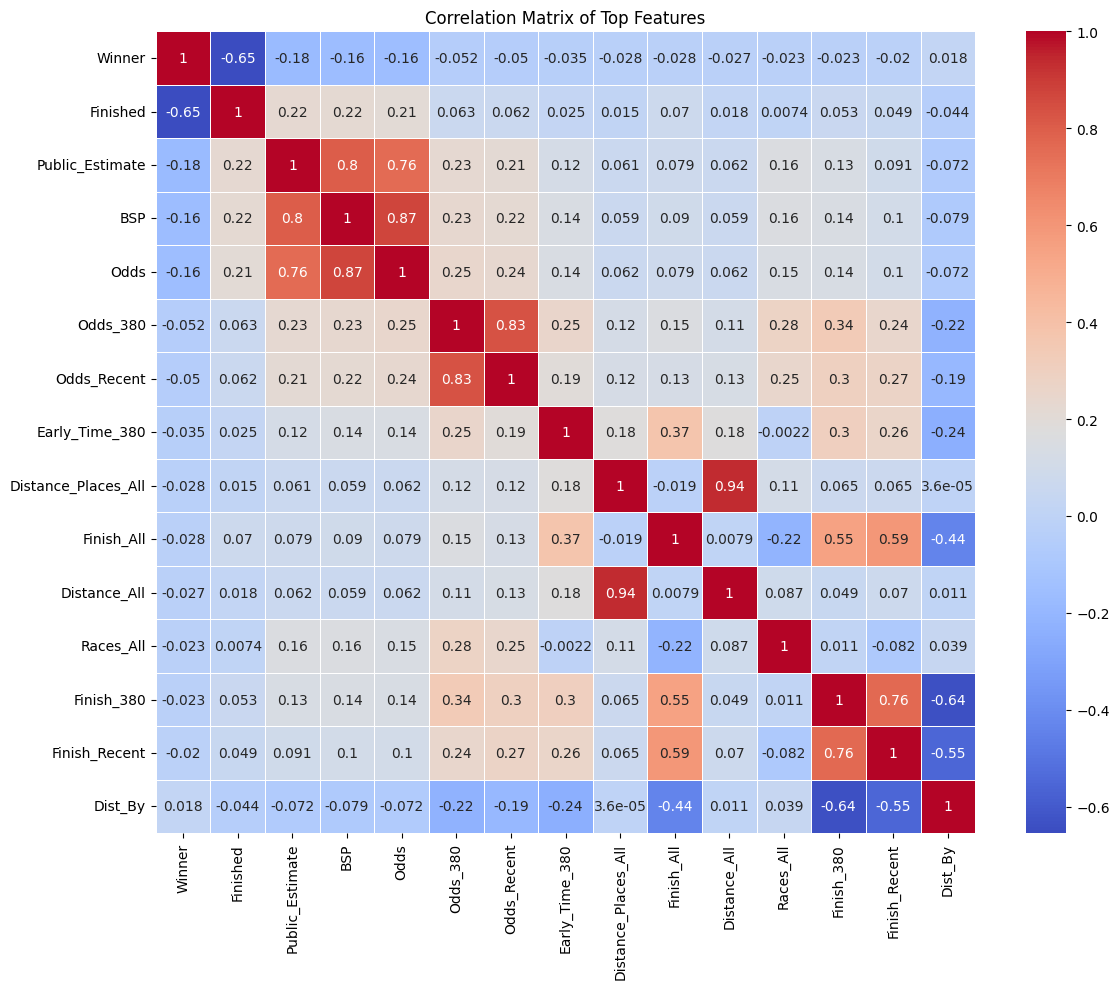

In [38]:
# Feature correlation with target variables
print("\nCorrelation with 'Finished':")
corr_finished = data.corr()['Finished'].sort_values(ascending=False)
print(corr_finished)

print("\nCorrelation with 'Winner':")
corr_winner = data.corr()['Winner'].sort_values(ascending=False)
print(corr_winner)

# Visualize correlation matrix (for top features)
plt.figure(figsize=(12, 10))
top_features = corr_winner.abs().sort_values(ascending=False).head(15).index
sns.heatmap(data[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Top Features')
plt.tight_layout()
plt.show()

In [39]:
# Data Preprocessing
# Separate features and target variables
X = data.drop(['Finished', 'Winner'], axis=1)
y_finished = data['Finished']
y_winner = data['Winner']

# (Race_ID is likely not useful for prediction)
X = X.drop(['Race_ID'], axis=1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_finished_train, y_finished_test = train_test_split(X, y_finished, test_size=0.2, random_state=42)
_, _, y_winner_train, y_winner_test = train_test_split(X, y_winner, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to pandas DataFrame for better readability
feature_names = X.columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Feature names: {feature_names.tolist()}")

Training set shape: (9604, 25)
Test set shape: (2402, 25)
Feature names: ['Trap', 'Odds', 'BSP', 'Public_Estimate', 'Last_Run', 'Distance_All', 'Finish_All', 'Distance_Places_All', 'Races_All', 'Distance_Recent', 'Finish_Recent', 'Odds_Recent', 'Early_Recent', 'Races_380', 'Wins_380', 'Finish_380', 'Odds_380', 'Early_380', 'Grade_380', 'Time_380', 'Early_Time_380', 'Stay_380', 'Favourite', 'Wide_380', 'Dist_By']


Logistic Regression Accuracy: 0.8343

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2004
           1       0.00      0.00      0.00       398

    accuracy                           0.83      2402
   macro avg       0.42      0.50      0.45      2402
weighted avg       0.70      0.83      0.76      2402


Feature Importance (Top 10):
            Feature  Coefficient
17        Early_380     0.102630
18        Grade_380     0.065621
15       Finish_380     0.058747
16         Odds_380     0.038265
4          Last_Run     0.037828
5      Distance_All     0.032093
13        Races_380     0.030847
10    Finish_Recent     0.024030
9   Distance_Recent     0.019238
22        Favourite     0.016828


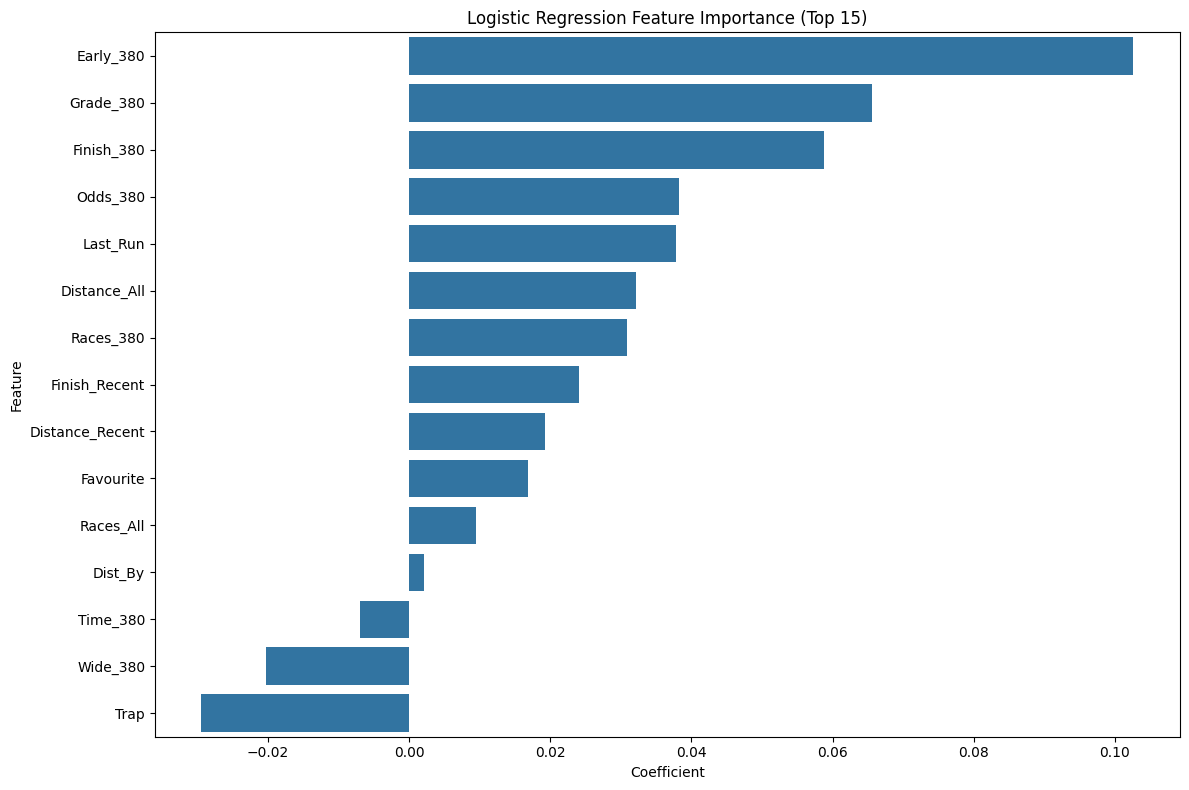

In [40]:
# Logistic Regression for binary classification (Winner prediction)
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred = log_reg.predict(X_test_scaled)
y_winner_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred))

# Feature importance
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg.coef_[0]
})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
print("\nFeature Importance (Top 10):")
print(coef_df.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature')
plt.title('Logistic Regression Feature Importance (Top 15)')
plt.tight_layout()
plt.show()

Decision Tree Accuracy for Finished Position: 0.1823

Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.20      0.20       398
           2       0.15      0.17      0.16       357
           3       0.16      0.18      0.17       395
           4       0.17      0.16      0.17       413
           5       0.18      0.16      0.17       410
           6       0.22      0.21      0.22       429

    accuracy                           0.18      2402
   macro avg       0.18      0.18      0.18      2402
weighted avg       0.18      0.18      0.18      2402


Feature Importance (Top 10):
          Feature  Importance
2             BSP    0.068428
6      Finish_All    0.059234
24        Dist_By    0.057379
11    Odds_Recent    0.054135
18      Grade_380    0.053154
19       Time_380    0.049094
10  Finish_Recent    0.048844
16       Odds_380    0.047793
8       Races_All    0.047674
21       Stay_380    0.045211


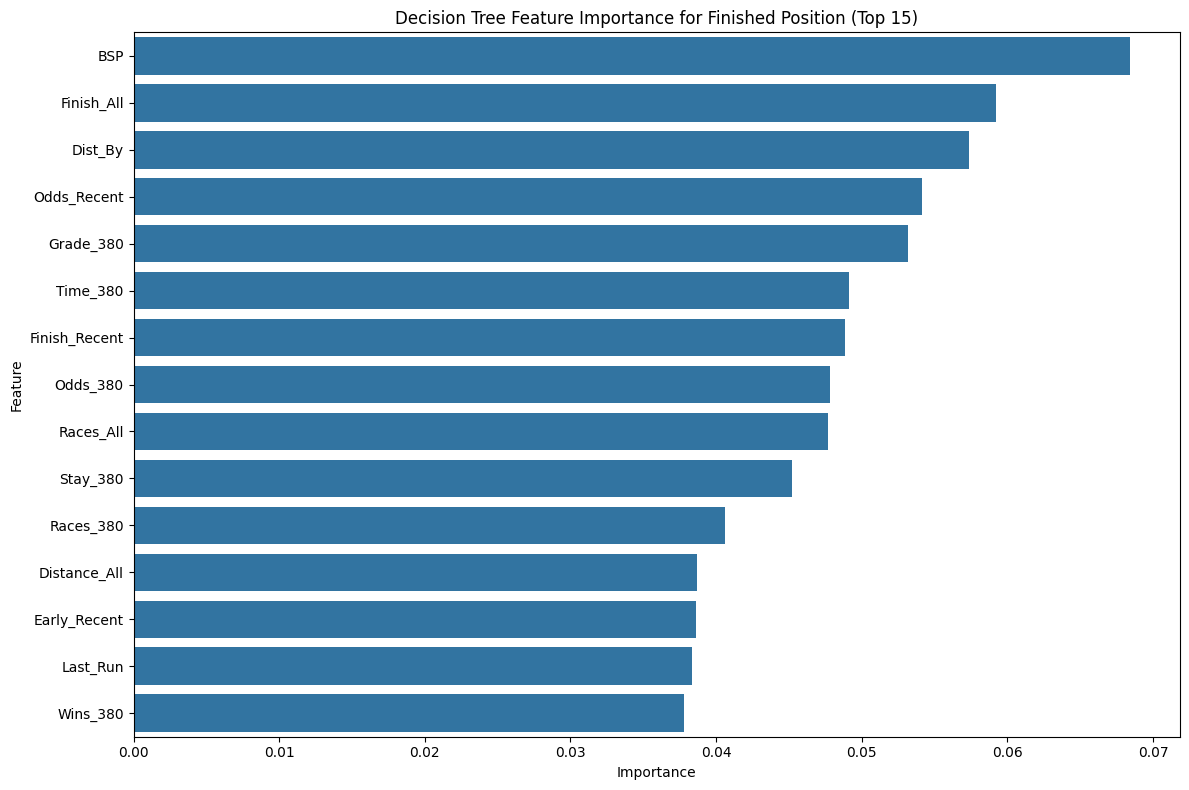

In [41]:
# Decision Tree for multiclass classification (Finished position prediction)
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_finished = DecisionTreeClassifier(random_state=42)

# Train the model
dt_finished.fit(X_train_scaled, y_finished_train)

# Make predictions
y_finished_pred = dt_finished.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred)
print(f"Decision Tree Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_finished.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Decision Tree Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

Decision Tree Accuracy for Winner Prediction: 0.7348

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2004
           1       0.24      0.27      0.25       398

    accuracy                           0.73      2402
   macro avg       0.54      0.55      0.55      2402
weighted avg       0.75      0.73      0.74      2402


Feature Importance (Top 10):
          Feature  Importance
2             BSP    0.090247
16       Odds_380    0.060968
8       Races_All    0.060545
10  Finish_Recent    0.055783
24        Dist_By    0.055436
12   Early_Recent    0.054216
19       Time_380    0.052532
6      Finish_All    0.052332
5    Distance_All    0.051860
21       Stay_380    0.050030


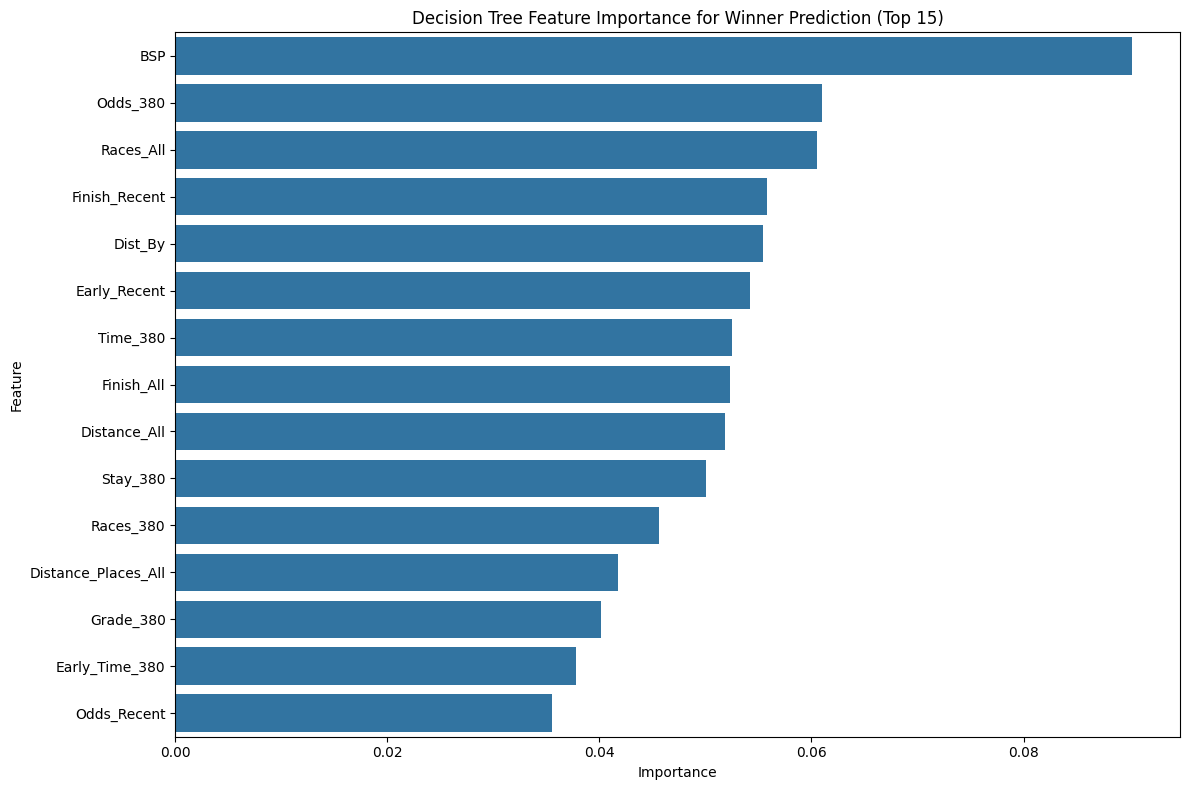

In [42]:
# Decision Tree for binary classification (Winner prediction)
dt_winner = DecisionTreeClassifier(random_state=42)

# Train the model
dt_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_dt = dt_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_dt)
print(f"Decision Tree Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_dt))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_winner.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Decision Tree Feature Importance for Winner Prediction (Top 15)')
plt.tight_layout()
plt.show()

Random Forest Accuracy for Finished Position: 0.2077

Classification Report:
              precision    recall  f1-score   support

           1       0.23      0.29      0.25       398
           2       0.18      0.20      0.19       357
           3       0.17      0.15      0.16       395
           4       0.21      0.18      0.19       413
           5       0.20      0.17      0.18       410
           6       0.25      0.25      0.25       429

    accuracy                           0.21      2402
   macro avg       0.21      0.21      0.21      2402
weighted avg       0.21      0.21      0.21      2402


Feature Importance (Top 10):
         Feature  Importance
2            BSP    0.061653
6     Finish_All    0.052420
24       Dist_By    0.051406
19      Time_380    0.050523
11   Odds_Recent    0.050034
8      Races_All    0.048774
16      Odds_380    0.048487
5   Distance_All    0.046734
13     Races_380    0.046202
12  Early_Recent    0.045625


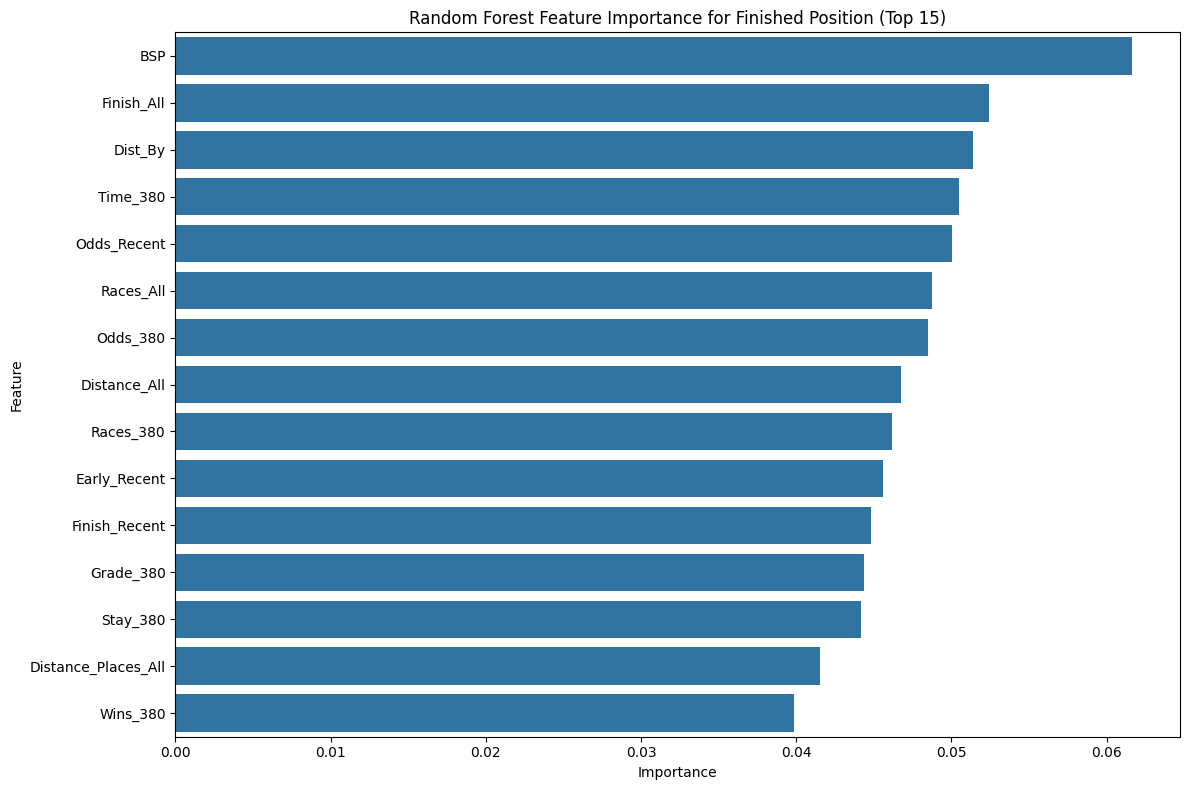

In [43]:
# Random Forest for multiclass classification (Finished position prediction)
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_finished = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_finished.fit(X_train_scaled, y_finished_train)

# Make predictions
y_finished_pred_rf = rf_finished.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred_rf)
print(f"Random Forest Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred_rf))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_finished.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Random Forest Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

Random Forest Accuracy for Winner Prediction: 0.8322

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2004
           1       0.37      0.02      0.03       398

    accuracy                           0.83      2402
   macro avg       0.60      0.51      0.47      2402
weighted avg       0.76      0.83      0.76      2402


Feature Importance (Top 10):
         Feature  Importance
2            BSP    0.074735
11   Odds_Recent    0.051530
6     Finish_All    0.050934
19      Time_380    0.050292
8      Races_All    0.050141
24       Dist_By    0.049850
16      Odds_380    0.048662
5   Distance_All    0.046110
12  Early_Recent    0.045897
13     Races_380    0.045343


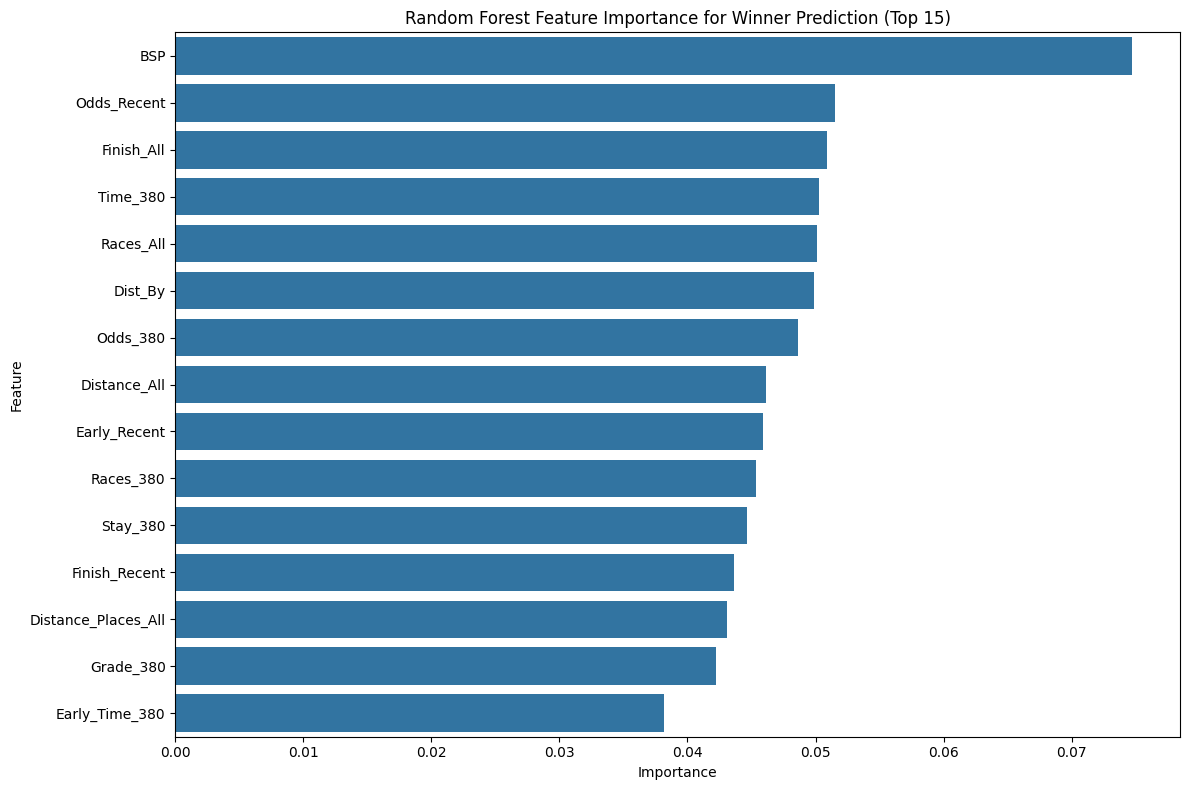

In [44]:
# Random Forest for binary classification (Winner prediction)
rf_winner = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_rf = rf_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_rf)
print(f"Random Forest Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_rf))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_winner.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Random Forest Feature Importance for Winner Prediction (Top 15)')
plt.tight_layout()
plt.show()

Gradient Boosting Accuracy for Finished Position: 0.2302

Classification Report:
              precision    recall  f1-score   support

           1       0.24      0.36      0.29       398
           2       0.19      0.18      0.18       357
           3       0.20      0.16      0.18       395
           4       0.25      0.17      0.20       413
           5       0.22      0.18      0.19       410
           6       0.27      0.31      0.29       429

    accuracy                           0.23      2402
   macro avg       0.23      0.23      0.22      2402
weighted avg       0.23      0.23      0.22      2402


Feature Importance (Top 10):
                Feature  Importance
2                   BSP    0.201742
6            Finish_All    0.058183
24              Dist_By    0.054245
5          Distance_All    0.053299
7   Distance_Places_All    0.052308
10        Finish_Recent    0.051733
11          Odds_Recent    0.050648
19             Time_380    0.049075
21             Stay_38

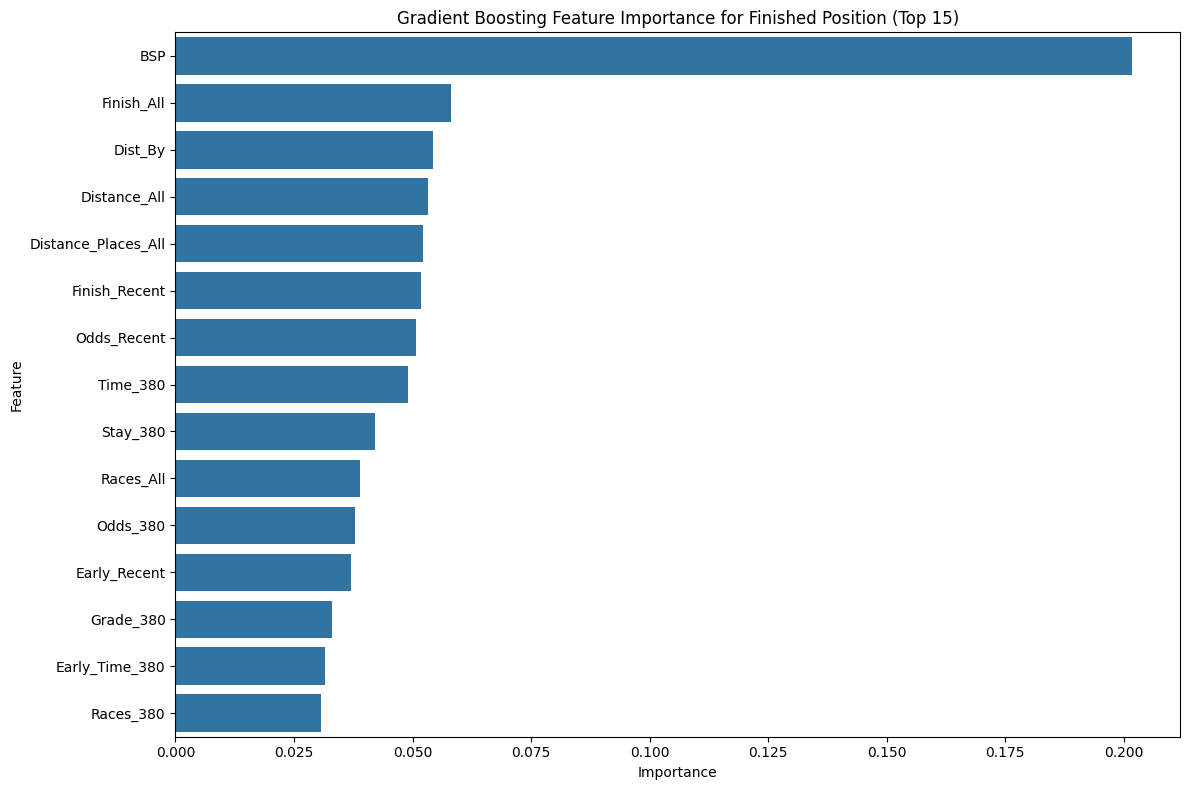

In [45]:
# Gradient Boosting for multiclass classification (Finished position prediction)
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_finished = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_finished.fit(X_train_scaled, y_finished_train)

# Make predictions
y_finished_pred_gb = gb_finished.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred_gb)
print(f"Gradient Boosting Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred_gb))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_finished.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Gradient Boosting Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

Gradient Boosting Accuracy for Winner Prediction: 0.8339

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2004
           1       0.40      0.01      0.01       398

    accuracy                           0.83      2402
   macro avg       0.62      0.50      0.46      2402
weighted avg       0.76      0.83      0.76      2402


Feature Importance (Top 10):
         Feature  Importance
2            BSP    0.384240
1           Odds    0.056416
12  Early_Recent    0.052239
5   Distance_All    0.047737
19      Time_380    0.046584
16      Odds_380    0.045637
21      Stay_380    0.037754
24       Dist_By    0.034434
11   Odds_Recent    0.031570
18     Grade_380    0.028785


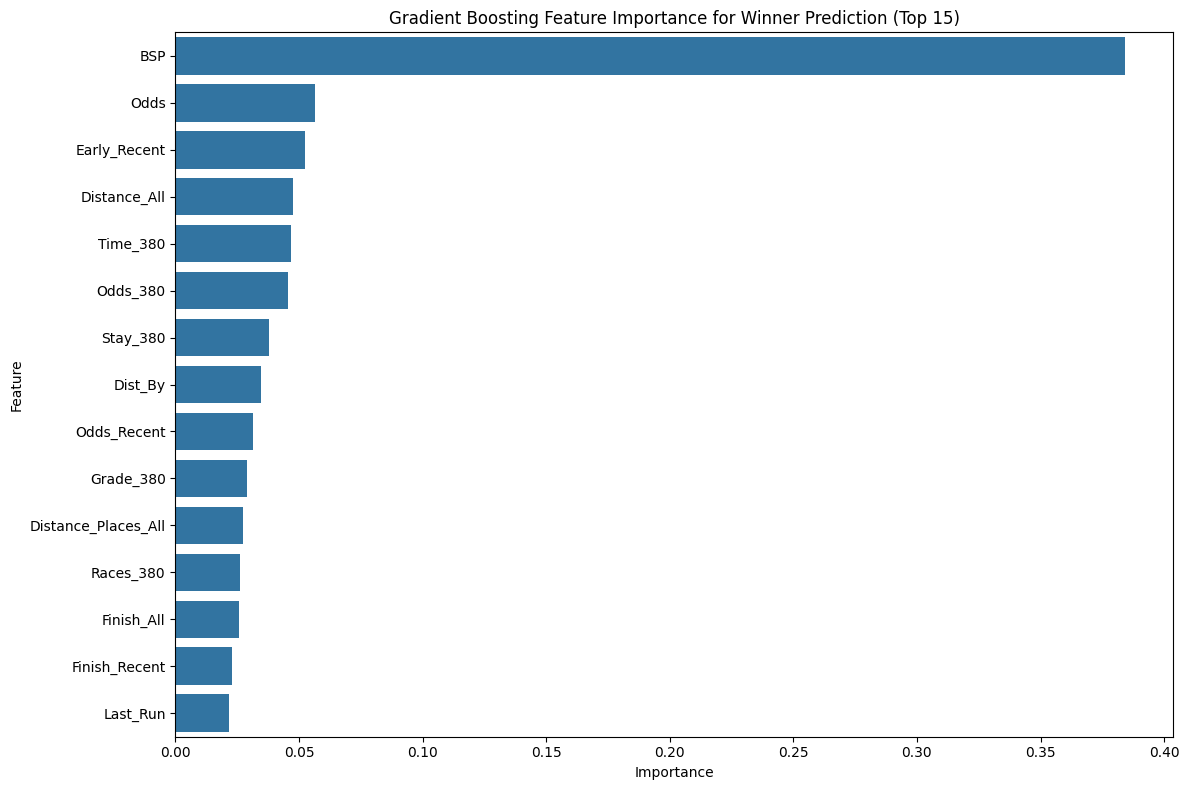

In [46]:
# Gradient Boosting for binary classification (Winner prediction)
gb_winner = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_gb = gb_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_gb)
print(f"Gradient Boosting Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_gb))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_winner.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Gradient Boosting Feature Importance for Winner Prediction (Top 15)')
plt.tight_layout()
plt.show()

In [47]:
# Bagging Classifier for multiclass classification (Finished position prediction)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_finished = BaggingClassifier(estimator=base_estimator, 
                                     n_estimators=100, 
                                     random_state=42)

# Train the model
bagging_finished.fit(X_train_scaled, y_finished_train)

# Make predictions
y_finished_pred_bagging = bagging_finished.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred_bagging)
print(f"Bagging Classifier Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred_bagging))

Bagging Classifier Accuracy for Finished Position: 0.2082

Classification Report:
              precision    recall  f1-score   support

           1       0.22      0.28      0.25       398
           2       0.17      0.19      0.18       357
           3       0.17      0.16      0.16       395
           4       0.21      0.17      0.19       413
           5       0.20      0.18      0.19       410
           6       0.28      0.27      0.27       429

    accuracy                           0.21      2402
   macro avg       0.21      0.21      0.21      2402
weighted avg       0.21      0.21      0.21      2402



In [48]:
# Bagging Classifier for binary classification (Winner prediction)
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_winner = BaggingClassifier(estimator=base_estimator, 
                                   n_estimators=100, 
                                   random_state=42)

# Train the model
bagging_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_bagging = bagging_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_bagging)
print(f"Bagging Classifier Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_bagging))

Bagging Classifier Accuracy for Winner Prediction: 0.8297

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2004
           1       0.28      0.02      0.03       398

    accuracy                           0.83      2402
   macro avg       0.56      0.50      0.47      2402
weighted avg       0.74      0.83      0.76      2402



AdaBoost Accuracy for Finished Position: 0.2177

Classification Report:
              precision    recall  f1-score   support

           1       0.26      0.30      0.28       398
           2       0.19      0.24      0.21       357
           3       0.18      0.16      0.17       395
           4       0.20      0.11      0.14       413
           5       0.19      0.15      0.17       410
           6       0.26      0.34      0.30       429

    accuracy                           0.22      2402
   macro avg       0.21      0.22      0.21      2402
weighted avg       0.21      0.22      0.21      2402


Feature Importance (Top 10):
                Feature  Importance
2                   BSP    0.653990
8             Races_All    0.058814
21             Stay_380    0.057199
19             Time_380    0.034846
6            Finish_All    0.033277
13            Races_380    0.032102
7   Distance_Places_All    0.029469
15           Finish_380    0.022997
1                  Odds    0.01

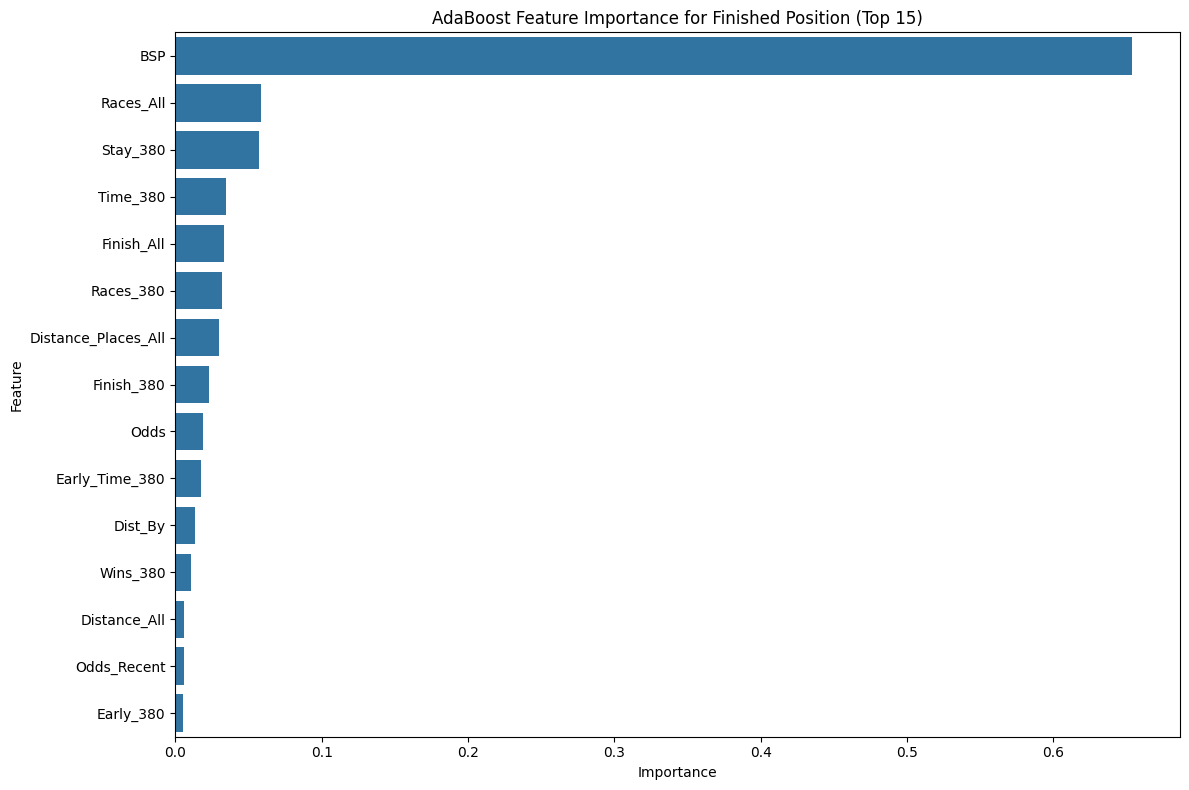

In [49]:
# AdaBoost for multiclass classification (Finished position prediction)
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
adaboost_finished = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                       n_estimators=100,
                                       random_state=42)

# Train the model
adaboost_finished.fit(X_train_scaled, y_finished_train)

# Make predictions
y_finished_pred_ada = adaboost_finished.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred_ada)
print(f"AdaBoost Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred_ada))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': adaboost_finished.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('AdaBoost Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

AdaBoost Accuracy for Winner Prediction: 0.8343

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2004
           1       0.00      0.00      0.00       398

    accuracy                           0.83      2402
   macro avg       0.42      0.50      0.45      2402
weighted avg       0.70      0.83      0.76      2402


Feature Importance (Top 10):
                Feature  Importance
2                   BSP    0.993489
15           Finish_380    0.006511
0                  Trap    0.000000
3       Public_Estimate    0.000000
1                  Odds    0.000000
5          Distance_All    0.000000
6            Finish_All    0.000000
7   Distance_Places_All    0.000000
4              Last_Run    0.000000
8             Races_All    0.000000


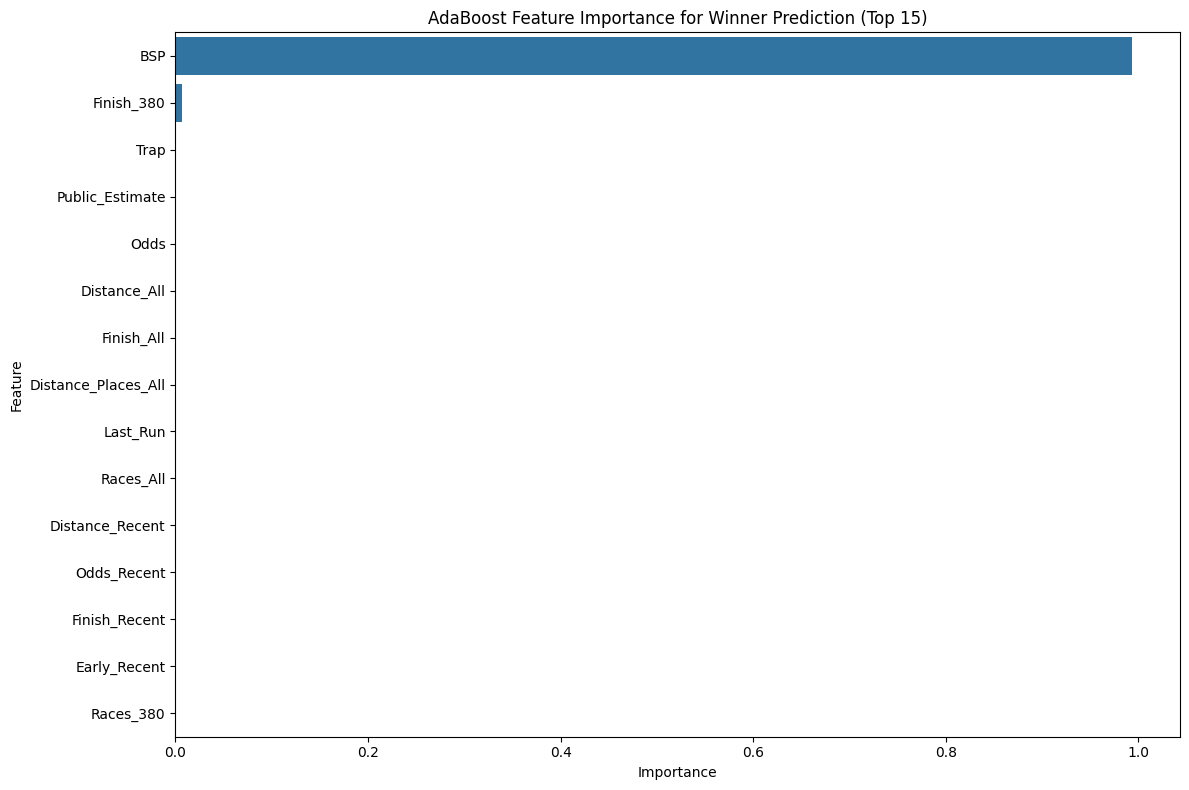

In [50]:
# AdaBoost for binary classification (Winner prediction)
adaboost_winner = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                     n_estimators=100,
                                     random_state=42)

# Train the model
adaboost_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_ada = adaboost_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_ada)
print(f"AdaBoost Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_ada))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': adaboost_winner.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('AdaBoost Feature Importance for Winner Prediction (Top 15)')
plt.tight_layout()
plt.show()

XGBoost Accuracy for Finished Position: 0.2348

Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.36      0.30       398
           2       0.22      0.23      0.23       357
           3       0.19      0.16      0.18       395
           4       0.23      0.15      0.18       413
           5       0.20      0.17      0.18       410
           6       0.29      0.33      0.31       429

    accuracy                           0.23      2402
   macro avg       0.23      0.23      0.23      2402
weighted avg       0.23      0.23      0.23      2402


Feature Importance (Top 10):
            Feature  Importance
2               BSP    0.080117
13        Races_380    0.042266
3   Public_Estimate    0.041326
21         Stay_380    0.041186
19         Time_380    0.040889
8         Races_All    0.040480
6        Finish_All    0.039706
16         Odds_380    0.039363
24          Dist_By    0.039332
11      Odds_Recent    0.038768


<Figure size 1200x800 with 0 Axes>

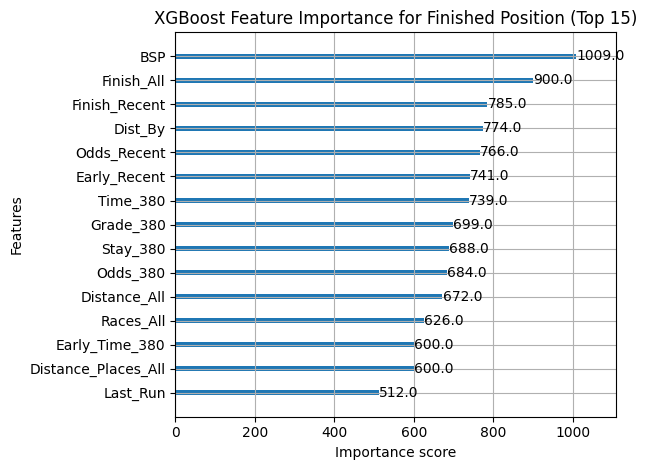

In [51]:
# XGBoost for multiclass classification (Finished position prediction)
import xgboost as xgb

# Transform the target variable to be zero-indexed
y_finished_train_xgb = y_finished_train - 1
y_finished_test_xgb = y_finished_test - 1

# Initialize the model
xgb_finished = xgb.XGBClassifier(n_estimators=100, 
                                 learning_rate=0.1, 
                                 max_depth=5,
                                 random_state=42)

# Train the model
xgb_finished.fit(X_train_scaled, y_finished_train_xgb)

# Make predictions
y_finished_pred_xgb = xgb_finished.predict(X_test_scaled)

# Convert predictions back to original scale (1-6)
y_finished_pred_xgb = y_finished_pred_xgb + 1

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred_xgb)
print(f"XGBoost Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred_xgb))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_finished.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_finished, max_num_features=15)
plt.title('XGBoost Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

XGBoost Accuracy for Winner Prediction: 0.8331

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2004
           1       0.42      0.02      0.04       398

    accuracy                           0.83      2402
   macro avg       0.63      0.51      0.47      2402
weighted avg       0.77      0.83      0.76      2402


Feature Importance (Top 10):
      Feature  Importance
2         BSP    0.128410
1        Odds    0.055714
24    Dist_By    0.040492
23   Wide_380    0.040195
17  Early_380    0.039603
16   Odds_380    0.039091
13  Races_380    0.038772
18  Grade_380    0.038447
21   Stay_380    0.038356
19   Time_380    0.037606


<Figure size 1200x800 with 0 Axes>

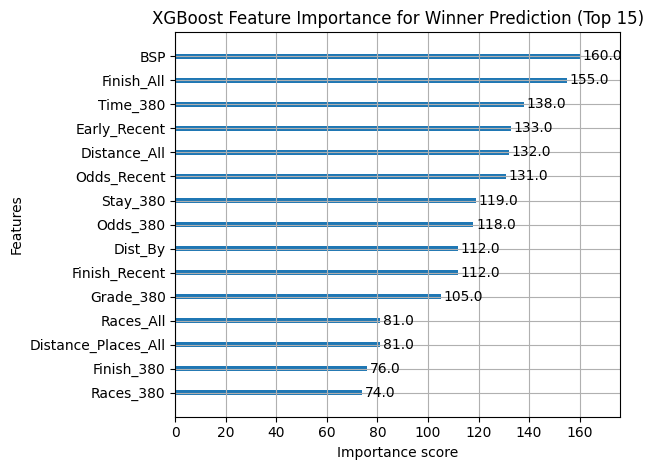

In [52]:
# XGBoost for binary classification (Winner prediction)
xgb_winner = xgb.XGBClassifier(n_estimators=100, 
                               learning_rate=0.1, 
                               max_depth=5,
                               random_state=42)

# Train the model
xgb_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_xgb = xgb_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_xgb)
print(f"XGBoost Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_xgb))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_winner.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_winner, max_num_features=15)
plt.title('XGBoost Feature Importance for Winner Prediction (Top 15)')
plt.tight_layout()
plt.show()

Model Comparison for Finished Position Prediction:
                Model  Accuracy
5             XGBoost  0.234804
2   Gradient Boosting  0.230225
4            AdaBoost  0.217735
3  Bagging Classifier  0.208160
1       Random Forest  0.207744
0       Decision Tree  0.182348


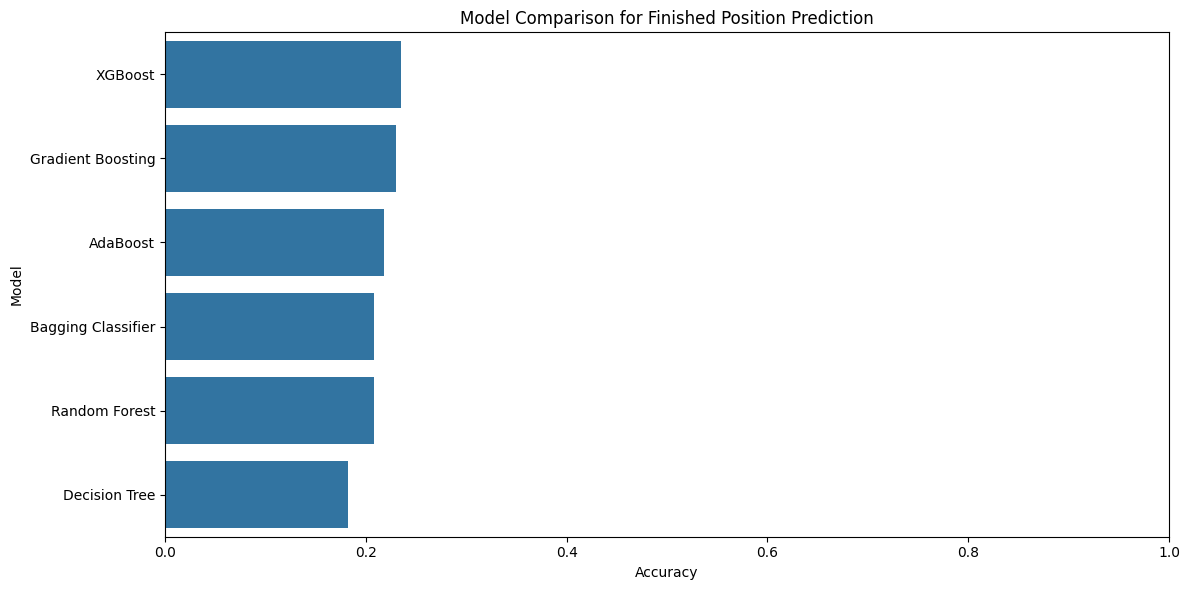

In [53]:
# Compare model performance for Finished position prediction
models_finished = {
    'Decision Tree': y_finished_pred,
    'Random Forest': y_finished_pred_rf,
    'Gradient Boosting': y_finished_pred_gb,
    'Bagging Classifier': y_finished_pred_bagging,
    'AdaBoost': y_finished_pred_ada,
    'XGBoost': y_finished_pred_xgb
}

accuracies_finished = {}
for name, predictions in models_finished.items():
    accuracies_finished[name] = accuracy_score(y_finished_test, predictions)

# Create a DataFrame for comparison
comparison_finished = pd.DataFrame({
    'Model': list(accuracies_finished.keys()),
    'Accuracy': list(accuracies_finished.values())
}).sort_values('Accuracy', ascending=False)

print("Model Comparison for Finished Position Prediction:")
print(comparison_finished)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_finished, x='Accuracy', y='Model')
plt.title('Model Comparison for Finished Position Prediction')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

Model Comparison for Winner Prediction:
                 Model  Accuracy
0  Logistic Regression  0.834305
5             AdaBoost  0.834305
3    Gradient Boosting  0.833888
6              XGBoost  0.833056
2        Random Forest  0.832223
4   Bagging Classifier  0.829725
1        Decision Tree  0.734804


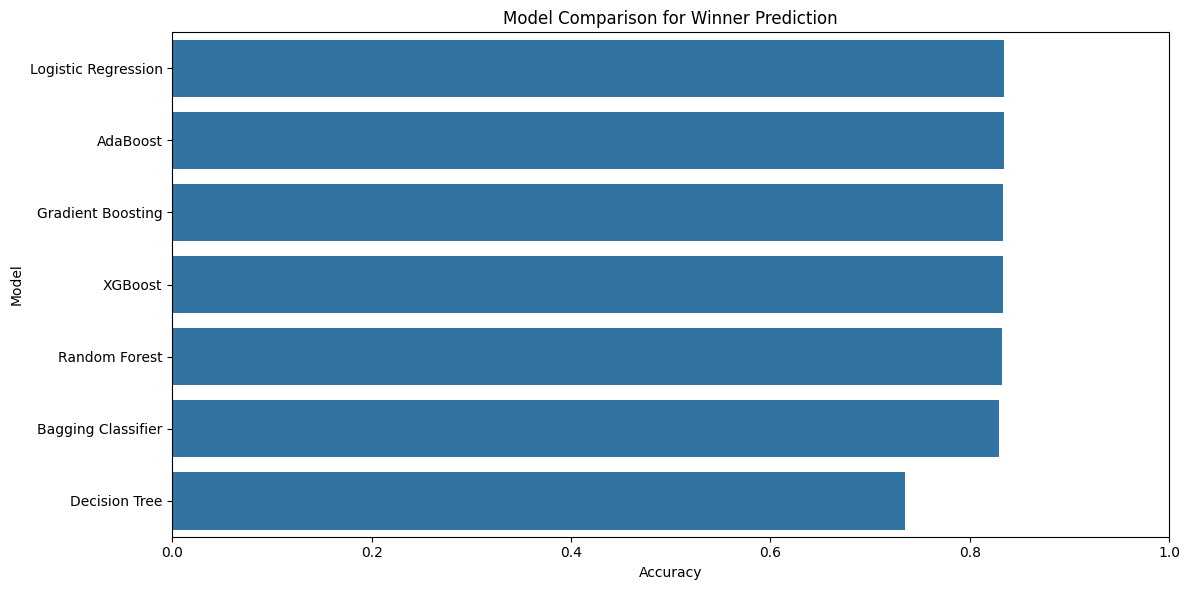

In [54]:
# Compare model performance for Winner prediction
models_winner = {
    'Logistic Regression': y_winner_pred,
    'Decision Tree': y_winner_pred_dt,
    'Random Forest': y_winner_pred_rf,
    'Gradient Boosting': y_winner_pred_gb,
    'Bagging Classifier': y_winner_pred_bagging,
    'AdaBoost': y_winner_pred_ada,
    'XGBoost': y_winner_pred_xgb
}

accuracies_winner = {}
for name, predictions in models_winner.items():
    accuracies_winner[name] = accuracy_score(y_winner_test, predictions)

# Create a DataFrame for comparison
comparison_winner = pd.DataFrame({
    'Model': list(accuracies_winner.keys()),
    'Accuracy': list(accuracies_winner.values())
}).sort_values('Accuracy', ascending=False)

print("Model Comparison for Winner Prediction:")
print(comparison_winner)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_winner, x='Accuracy', y='Model')
plt.title('Model Comparison for Winner Prediction')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

## Analysis of Model Performance in Greyhound Racing Prediction
The graph for finished position prediction reveals notably poor performance across all tree-based models:
- XGBoost performs best but still only achieves approximately 25% accuracy. 
- Gradient Boosting, Bagging Classifier, AdaBoost, and Random Forest deliver similar performance (around 22-23%)
- Decision Tree performs worst at roughly 18% accuracy.

Possible reasons:
1. Multiclass complexity: Predicting exact finishing positions (1-6) is inherently more difficult than binary classification. With 6 possible outcomes, even a random guess would yield about 16.7% accuracy, so our models only just barely beat chance.
2. Racing is a complex process: there are numerous unpredictable factors involved in racing, such as interactions between dogs during the race, unexpected behavior (such as falls), and subtle race dynamics that aren't captured in the feature set.
3. Lack of sequential data: Racing is a dynamic process, but we are working with static features to predict a dynamic process, contributing to the error term $u_i$.

In contrast, the models perform much better on the binary classification task of winner prediction:
- Most models achieve approximately 85% accuracy, with Decision Tree lagging behind the rest at a respectable 75% accuracy.

Possible reasons:
1. Simpler task: Predicting a win/not a win is fundamentally an easier task than predicting finishing position.
2. Better feature relevance: the features available appear to be good predictors of winning potential but less so at distinguishing between various finishing positions.

## Practical Implications
The results suggest that betting strategies focused on picking winners have more edge than strategies focused on predicting finishing places. For advanced modelling approaches, it might be worth simplifying the exact position prediction to buckets of "top 3" and/or "bottom 3", since this is both an easier classification task, but often also corresponds to available bets with the bookie. They might not make you a market on exact finishers 1-6, because the bookie's risk of ruin would be too high if they took the other side.

Of course, throwing in additional predictors might help. Further work could look into using a neural network to perform the same two classification tasks (binary - win/not win) and (multiclass - finished position).